In [3]:
import tensorflow as tf
from tensorflow.keras import models,layers
import numpy as np
import pandas as pd

In [4]:
train_data ='C:/Users/kaler/OneDrive/Desktop/BE/DL/Practicles/mnist-jpg/mnist-jpg/train'
test_data='C:/Users/kaler/OneDrive/Desktop/BE/DL/Practicles/mnist-jpg/mnist-jpg/test'


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
image_generator= ImageDataGenerator(rescale=(1.0/255))

In [10]:
train_data_generator =image_generator.flow_from_directory(
    train_data,
    target_size=(28,28),
    batch_size=50000,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True,
    
)
test_data_generator =image_generator.flow_from_directory(
    test_data,
    target_size=(28,28),
    batch_size=1000,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True,
    
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [11]:
x_train,y_train=train_data_generator[0]
x_test,y_test = test_data_generator[0]

In [18]:
from tensorflow import keras
model = keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation ='relu'),
    layers.Dense(10, activation ='softmax'),
])

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
history=model.fit(x_train,y_train, epochs=5, batch_size=30, validation_data=(x_test,y_test),shuffle=True)

Epoch 1/5
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9960 - loss: 0.0131 - val_accuracy: 0.9810 - val_loss: 0.0710
Epoch 2/5
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9970 - loss: 0.0093 - val_accuracy: 0.9820 - val_loss: 0.0795
Epoch 3/5
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9982 - loss: 0.0063 - val_accuracy: 0.9790 - val_loss: 0.1065
Epoch 4/5
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9985 - loss: 0.0047 - val_accuracy: 0.9840 - val_loss: 0.0678
Epoch 5/5
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9979 - loss: 0.0064 - val_accuracy: 0.9830 - val_loss: 0.0792


In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("accuracy",test_acc)
print("loss", test_loss)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9842 - loss: 0.0733
accuracy 0.9829999804496765
loss 0.07922140508890152


In [31]:
import matplotlib.pyplot as plt

In [33]:
class_names=['Zero','one','Two', 'three', 'four','five','six','seven','eight','nine']

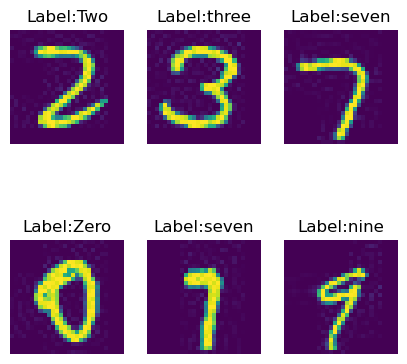

In [35]:
plt.figure(figsize=(5,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Label:{class_names[int(np.argmax(y_train[i]))]}")
    plt.axis('off')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


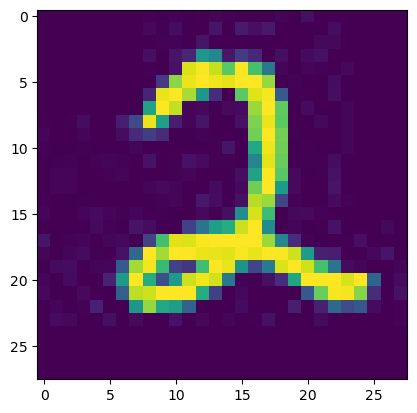

In [41]:
pred=model.predict(x_test)
plt.imshow(x_test[15])

In [42]:
print(f"The handwritten value predicted is : {np.argmax(pred[10])}")
print(f"The actual value  is : {np.argmax(y_test[10])}")

The handwritten value predicted is : 2
The actual value  is : 2


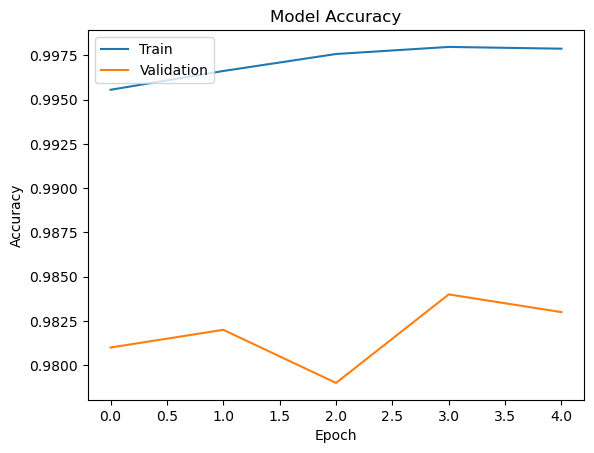

In [43]:
# Plot The Training LOSS And Accuracy
# Plotting The Training Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

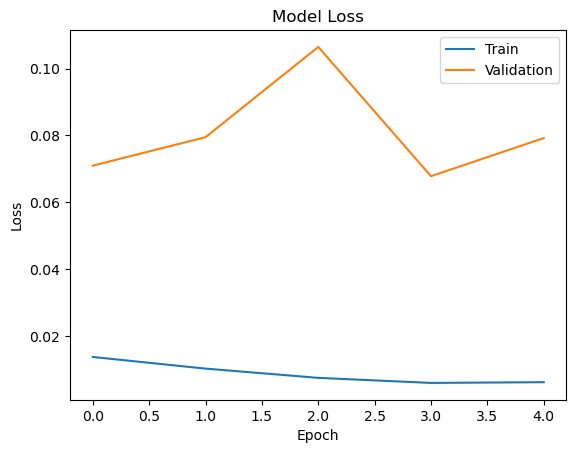

In [44]:
#Plotting The Training Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()